<a href="https://colab.research.google.com/github/vedantdalvi7/Robustness-Evaluation-of-neural-network-based-image-processing-models/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git init

Reinitialized existing Git repository in /content/.git/


In [5]:
!git config --global user.email"vgdalvi1997@gmail.com"
!git config --global user.name"vedantdalvi7"

In [9]:
!git add -A

In [10]:
!git commit -m “first commit”

error: pathspec 'commit”' did not match any file(s) known to git


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow  import *
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

import pathlib

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

global classes_name
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [8]:
def load_data(path):
  x = np.load(pathlib.Path(path))
  print(x.shape)
  return x

x1 = load_data('/content/drive/MyDrive/Colab Notebooks/Research Project/brightness.npy')
x2 = load_data('/content/drive/MyDrive/Colab Notebooks/Research Project/gaussian_noise.npy')
x3 = load_data('/content/drive/MyDrive/Colab Notebooks/Research Project/gaussian_blur.npy')
x4 = load_data('/content/drive/MyDrive/Colab Notebooks/Research Project/zoom_blur.npy')
x5 = load_data('/content/drive/MyDrive/Colab Notebooks/Research Project/contrast.npy')



(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [9]:
#Function to select specific severity level of corruptions

def select_severity(s, x):
  if s == 1:
    x = x[0:10000,:,:,:]
    print(x.shape)
    return x
  elif s == 2:
    x = x[10000:20000,:,:,:]
    print(x.shape)
    return x
  elif s == 3:
    x = x[20000:30000,:,:,:]
    print(x.shape)
    return x
  elif s == 4:
    x = x[30000:40000,:,:,:]
    print(x.shape)
    return x
  elif s == 5:
    x = x[40000:50000,:,:,:]
    print(x.shape)
    return x


x_bright = select_severity(5, x1)
x_gnoise = select_severity(5, x2)
x_gblur = select_severity(5, x3)
x_zoom_blur = select_severity(5, x4)
x_contrast = select_severity(5,x5)

(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


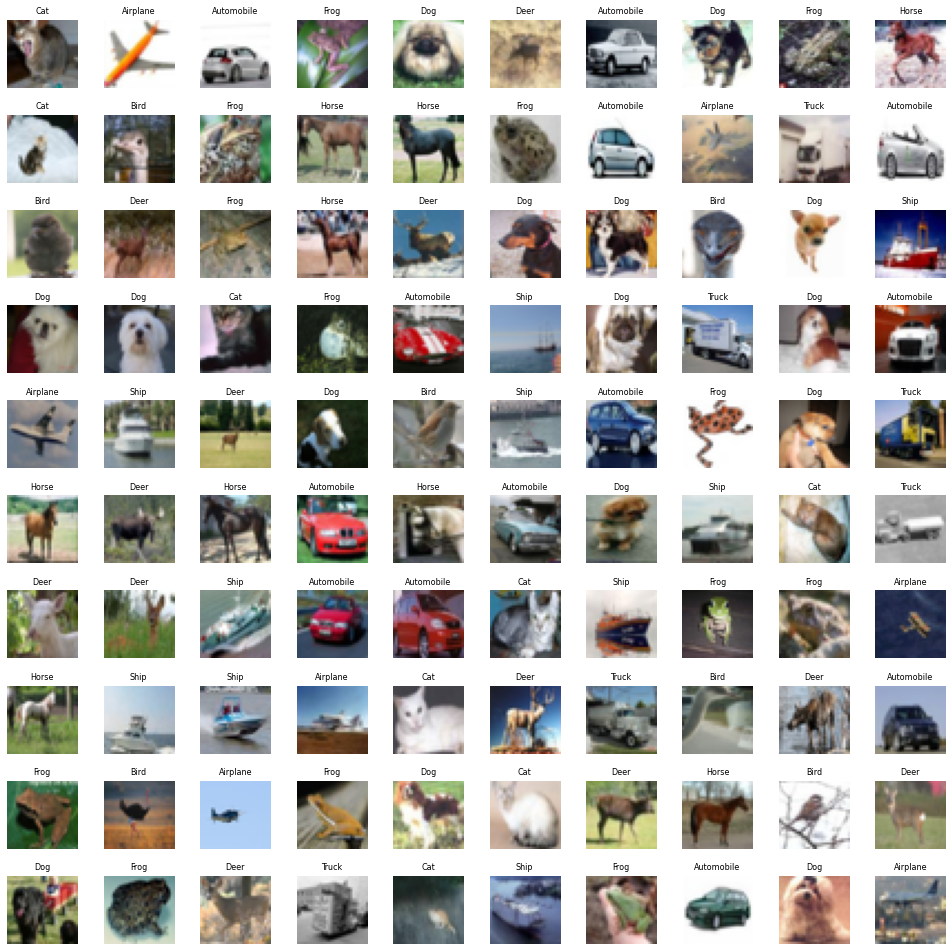

In [10]:
#Function to display data samples
def display_samples(x, y, classes_name):

          # Define the dimensions of the plot grid 
          W_grid = 10
          L_grid = 10
          
          # we can use the axes object to plot specific figures at various locations
          fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
          axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
          n_train = len(x) # get the length of the train dataset
          
          # Select a random number from 0 to n_train
          for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
            index = np.random.randint(0, n_train) 
            axes[i].imshow(x[index,1:]) # read and display an image with the selected index
            label_index = int(y[index])
            axes[i].set_title(classes_name[label_index], fontsize = 8)
            axes[i].axis('off')

          plt.subplots_adjust(hspace=0.4)

display_samples(X_train, y_train, classes_name)

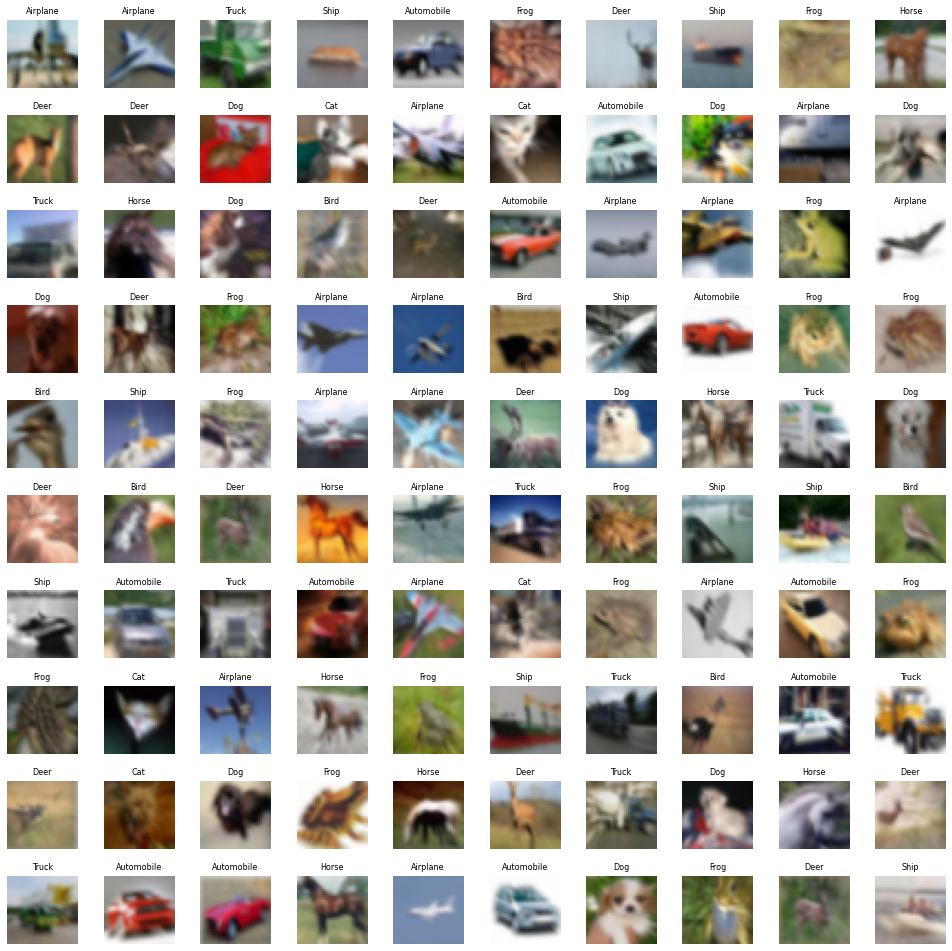

In [11]:
display_samples(x_zoom_blur, y_test, classes_name)

In [12]:

'''
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

'''

"\nclasses, counts = np.unique(y_train, return_counts=True)\nplt.barh(classes_name, counts)\nplt.title('Class distribution in training set')\n\n"

In [13]:
'''
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in clean testing set')

'''

"\nclasses, counts = np.unique(y_test, return_counts=True)\nplt.barh(classes_name, counts)\nplt.title('Class distribution in clean testing set')\n\n"

In [14]:
# Scale the data

X_train = X_train / 255.0
X_test = X_test / 255.0
x_gnoise = x_gnoise / 255.0
x_bright = x_bright / 255.0
x_contrast = x_contrast / 255.0
x_zoom_blur = x_zoom_blur / 255.0
x_gblur = x_gblur / 255.0

# Transform target variable into one-hotencoding

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
#load pretrained models
vgg19_model = keras.models.load_model('drive/MyDrive/Colab Notebooks/Research Project/models/VGG19')
vgg16_model = keras.models.load_model('drive/MyDrive/Colab Notebooks/Research Project/models/VGG16')
resnet50_model = keras.models.load_model('drive/MyDrive/Colab Notebooks/Research Project/models/ResNet50')

#Function to generate confusion matrix
def CM(model, x, ycat_TEST, ytest):
  evaluation = model.evaluate(x, ycat_TEST)
  print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
  
  y_pred = model.predict(x)
  y_pred = np.argmax(y_pred, axis=1)
  global cm
  cm = confusion_matrix(ytest, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes_name)
  #print(cm)
  # NOTE: Fill all variables here with default values of the plot_confusion_matrix
  fig, ax = plt.subplots(figsize=(10, 10))
  disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='Greens')
  plt.grid(False)
  plt.show()   


Evaluation of model on clean test data

313/313 [==============================] - 4s 11ms/step - loss: 0.6612 - accuracy: 0.8095 - precision: 0.8529 - recall: 0.7767
Test Accuracy : 80.95%
313/313 [==============================] - 3s 9ms/step


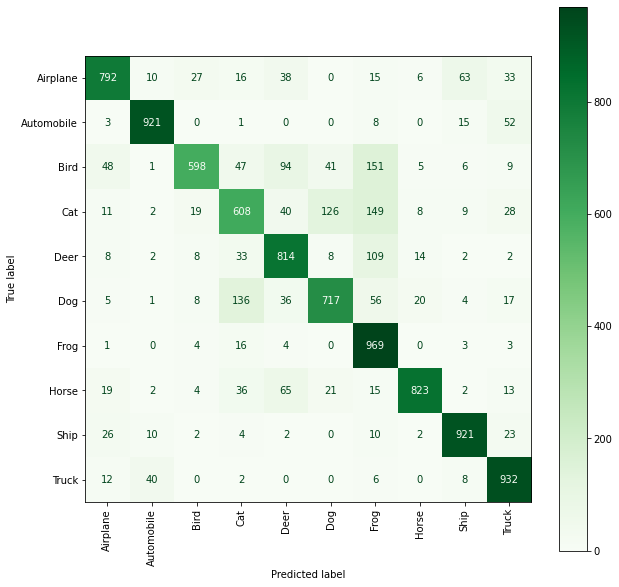

In [36]:
CM(vgg19_model, X_test, y_cat_test, y_test)

In [18]:
#htfhfhfcth

In [19]:
#Function for Model Accuracy Evaluation
Accuracy_values = []

def accuracy(cm):
  confusion_matrix = tf.convert_to_tensor(cm)
  diagonal_sum = tf.linalg.trace(cm)
  total_sum = tf.reduce_sum(confusion_matrix)
  accuracy = tf.divide(diagonal_sum, total_sum)
  accuracy = tf.multiply(accuracy,100)
  accuracy = accuracy.numpy()
  return accuracy


accuracy_clean = accuracy(cm)
print(f'Accuracy of clean test data in %:', accuracy_clean)

Accuracy of clean test data in %: 80.95


313/313 [==============================] - 3s 11ms/step - loss: 0.8548 - accuracy: 0.7289 - precision: 0.8058 - recall: 0.6737
Test Accuracy : 72.89%
313/313 [==============================] - 3s 9ms/step


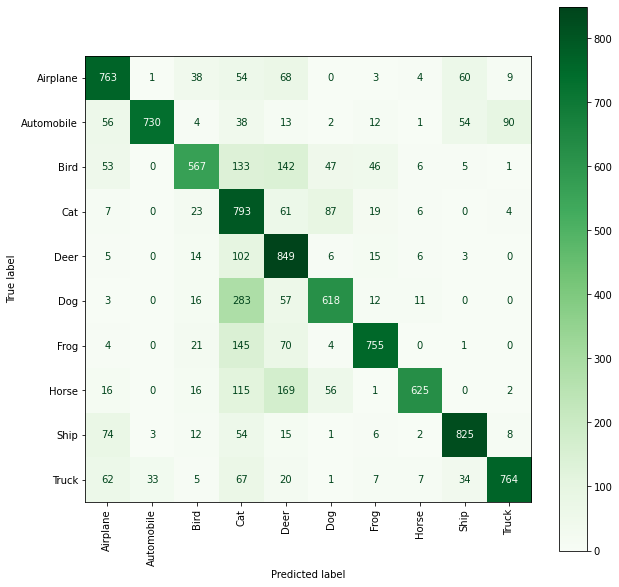

In [20]:
CM(vgg19_model, x_zoom_blur, y_cat_test, y_test)

In [21]:
'''
accuracy_zoomblur = accuracy(cm)
print(f'Accuracy of zoom blur test data (in %):', accuracy_zoomblur)
'''

"\naccuracy_zoomblur = accuracy(cm)\nprint(f'Accuracy of zoom blur test data (in %):', accuracy_zoomblur)\n"

In [26]:
#RLA = (accuracy(0%) - accuracy(x%)) / accuracy(0%)

RLA_values = []

def RLA(accuracy_clean, accuracy_corrupted):
    RLA_metric = (accuracy_clean - accuracy_corrupted) / accuracy_clean
    RLA_values.append(RLA_metric*100)
    return RLA_metric*100

#print("RLA for clean vs. zoom blur (in %):", RLA(accuracy_clean, accuracy_zoomblur))


In [23]:
def evaluate(model, x):
  CM(model, x, y_cat_test, y_test)
  accuracy_corr = accuracy(cm)
  #print(f"Accuracy of x =", accuracy_corr)
  rla = RLA(accuracy_clean, accuracy_corr)
  print(f"RLA of x =", rla)
  return rla

313/313 [==============================] - 4s 11ms/step - loss: 0.7991 - accuracy: 0.7676 - precision: 0.8174 - recall: 0.7317
Test Accuracy : 76.76%
313/313 [==============================] - 2s 7ms/step


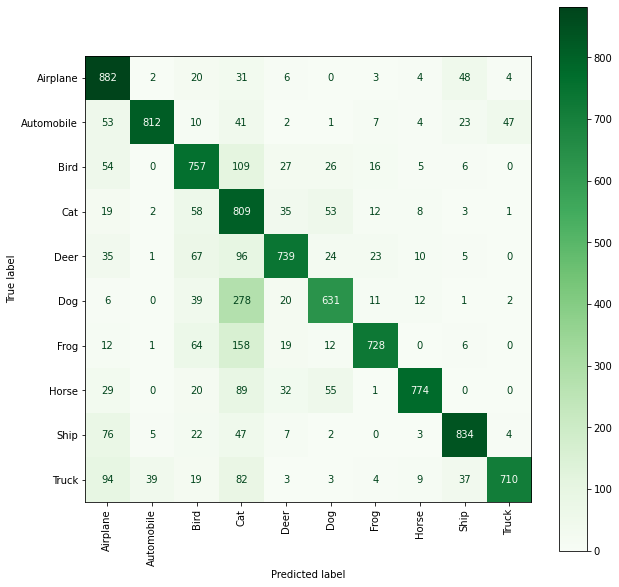

RLA of x = 5.17603458925264
313/313 [==============================] - 3s 11ms/step - loss: 1.0621 - accuracy: 0.7025 - precision: 0.7561 - recall: 0.6618
Test Accuracy : 70.25%
313/313 [==============================] - 2s 7ms/step


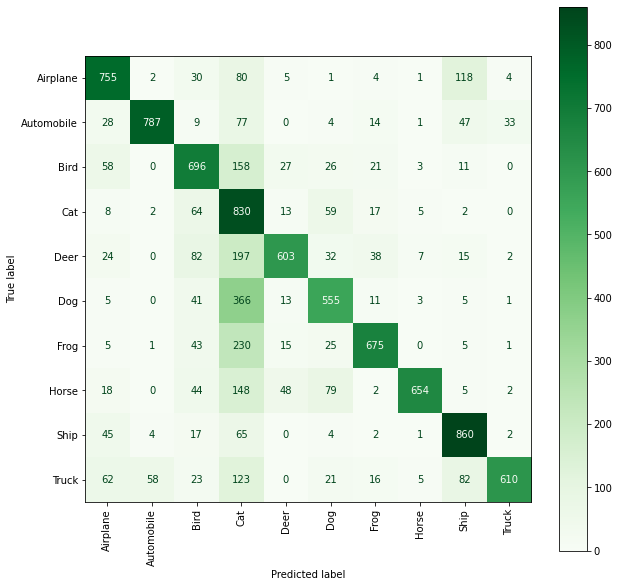

RLA of x = 13.21803582458308
313/313 [==============================] - 3s 10ms/step - loss: 0.6089 - accuracy: 0.8206 - precision: 0.8542 - recall: 0.7986
Test Accuracy : 82.06%
313/313 [==============================] - 2s 8ms/step


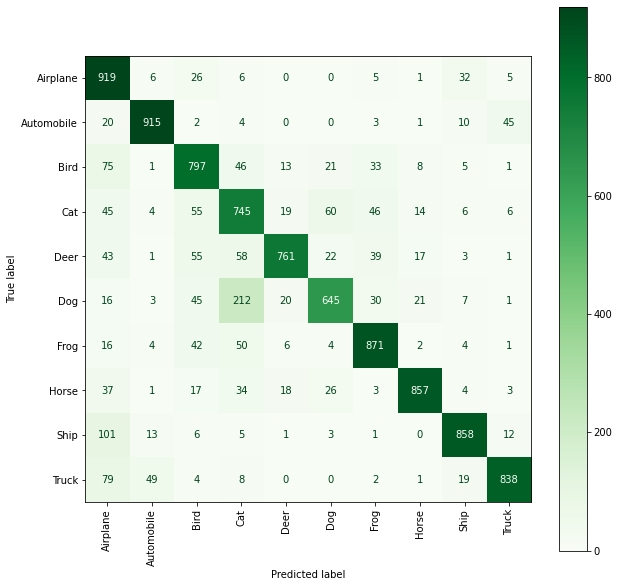

RLA of x = -1.3712168004941314
313/313 [==============================] - 3s 10ms/step - loss: 1.3727 - accuracy: 0.6262 - precision: 0.6874 - recall: 0.5840
Test Accuracy : 62.62%
313/313 [==============================] - 2s 7ms/step


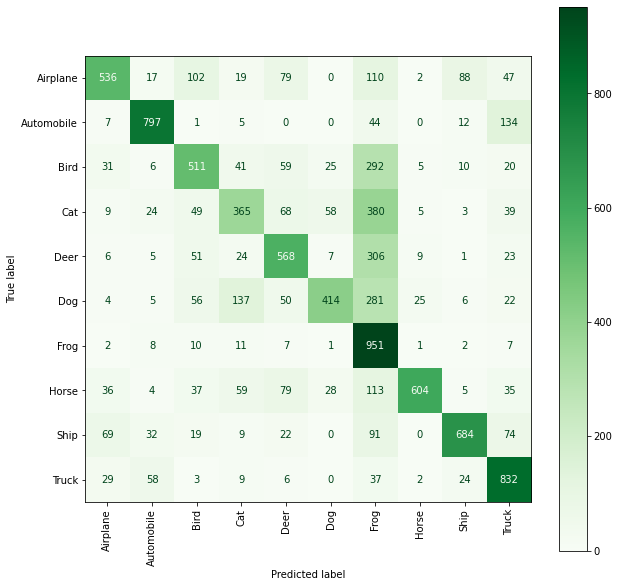

RLA of x = 22.64360716491662
313/313 [==============================] - 3s 10ms/step - loss: 2.4560 - accuracy: 0.3331 - precision: 0.4325 - recall: 0.2509
Test Accuracy : 33.31%
313/313 [==============================] - 2s 7ms/step


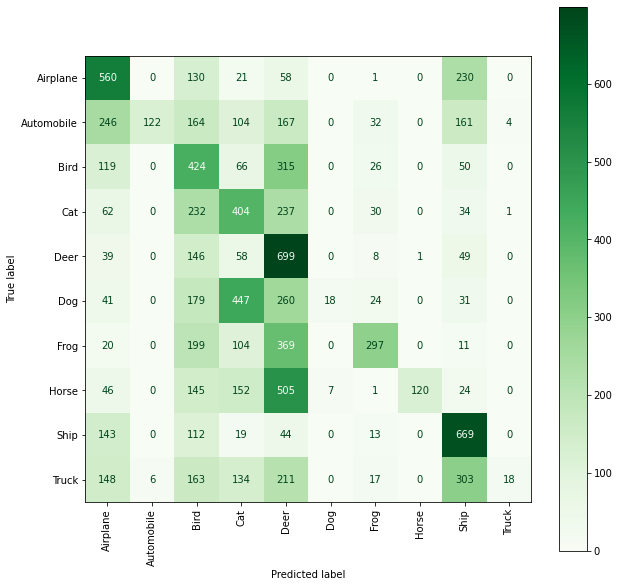

RLA of x = 58.85114268066708


In [38]:
#def model_evaluate(str:(path)):
#model = keras.models.load_model('path')
image_corruptions = (x_zoom_blur, x_gblur, x_bright, x_gnoise, x_contrast)
for i in image_corruptions:
  evaluate(vgg16_model, i)
  i=+1

#model_evaluate('/content/drive/MyDrive/Colab Notebooks/Research Project/models/ResNet50')

313/313 [==============================] - 7s 17ms/step - loss: 1.1952 - accuracy: 0.6723 - precision: 0.7154 - recall: 0.6379
Test Accuracy : 67.23%
313/313 [==============================] - 5s 12ms/step


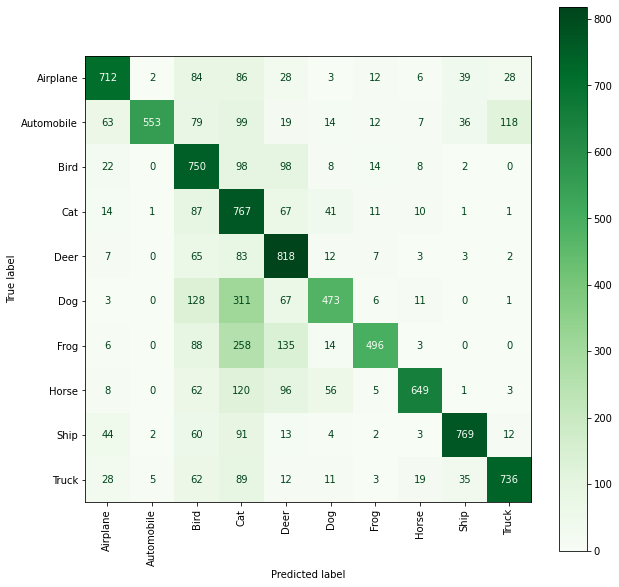

RLA of x = 16.948733786287832
313/313 [==============================] - 4s 14ms/step - loss: 1.4868 - accuracy: 0.6048 - precision: 0.6442 - recall: 0.5685
Test Accuracy : 60.48%
313/313 [==============================] - 3s 10ms/step


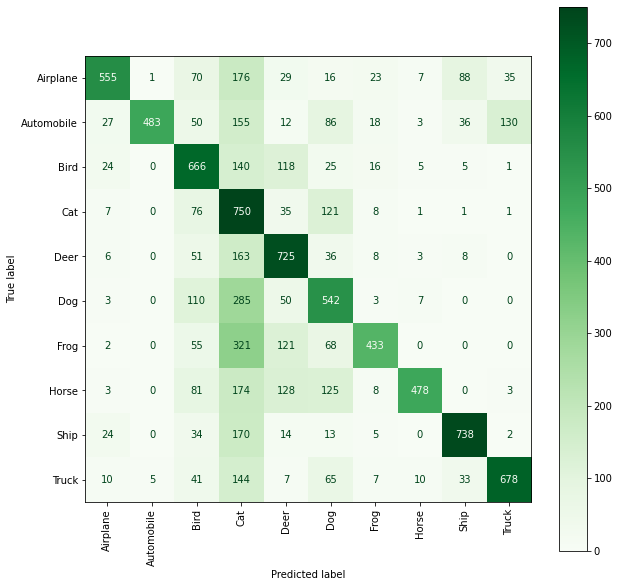

RLA of x = 25.28721432983323
313/313 [==============================] - 5s 17ms/step - loss: 0.9815 - accuracy: 0.7367 - precision: 0.7637 - recall: 0.7162
Test Accuracy : 73.67%
313/313 [==============================] - 3s 10ms/step


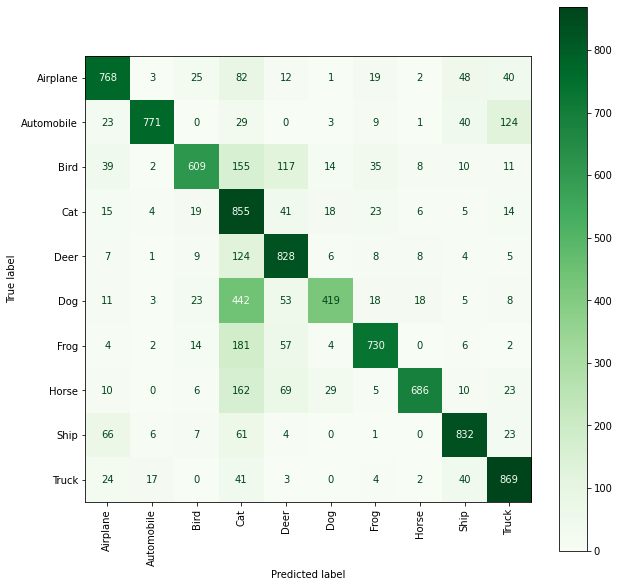

RLA of x = 8.993205682520076
313/313 [==============================] - 5s 15ms/step - loss: 1.9594 - accuracy: 0.5485 - precision: 0.5752 - recall: 0.5214
Test Accuracy : 54.85%
313/313 [==============================] - 3s 10ms/step


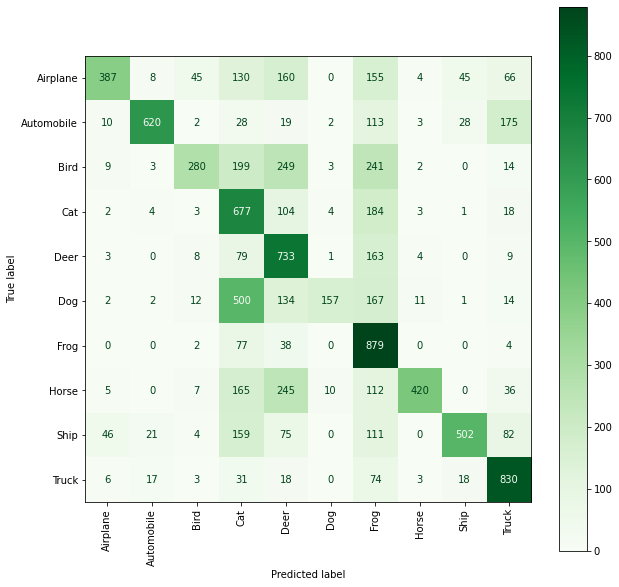

RLA of x = 32.24212476837554
313/313 [==============================] - 6s 18ms/step - loss: 4.0434 - accuracy: 0.2693 - precision: 0.3044 - recall: 0.2385
Test Accuracy : 26.93%
313/313 [==============================] - 3s 10ms/step


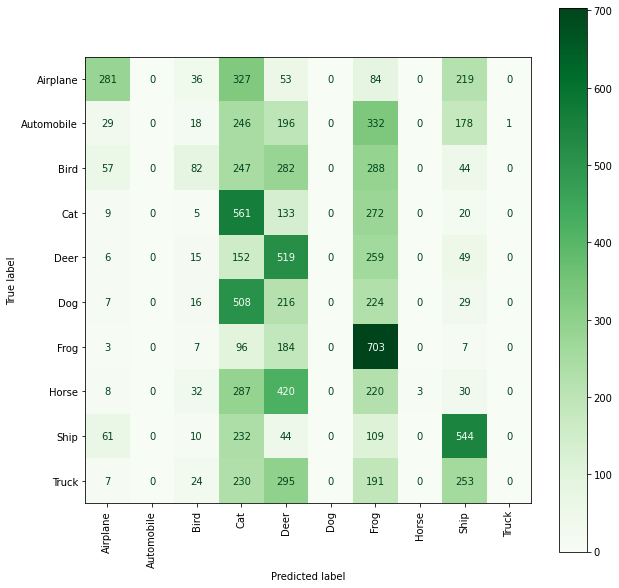

RLA of x = 66.7325509573811


In [39]:
for i in image_corruptions:
  evaluate(resnet50_model, i)
  i=+1

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
#ELA = (100 - accuracy(x%)) / accuracy(0%)

#def ELA(accuracy_clean, accuracy_corrupted):
   # ELA_metric = (100 - (accuracy_corrupted*100)) / (accuracy_clean*100)
   # return ELA_metric*100

#print("Equalized Loss of Accuracy in %:", ELA(accuracy_clean.numpy(), accuracy_corrupted.numpy()))

In [40]:
Accuracy_values = [accuracy_zoomblur, accuracy_gaussblur, accuracy_bright, accuracy_gnoise, accuracy_contrast ]
image_corruptions = ['zoom blur', 'gauss blur', 'brightness', 'gauss noise', 'contrast']
#RLA_values = ['RLA(accuracy_clean, accuracy_zoom_blur)','RLA(accuracy_clean, accuracy_gaussblur)','RLA(accuracy_clean, accuracy_bright)','RLA(accuracy_clean, accuracy_gnoise)','RLA(accuracy_clean, accuracy_contrast)']


import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


sns.reset_orig() 
#print(Accuracy_values)
#print(RLA_values)
plt.figure(figsize=(10,6))
plt.style.use("seaborn-bright")
plt.scatter(image_corruptions,RLA_values, cmap = 'jet', marker ='x')
plt.ylabel('RLA scores', fontweight="bold", fontsize="15")
plt.xlabel('Corruptions', fontweight="bold", fontsize="15")
plt.title('Robustness of VGG19 to image corruptions', fontweight="bold", fontsize="20")
plt.show()


NameError: ignored

In [ ]:
rn_RLA = []
#print("RLA for clean vs. zoom blur (in %):", RLA(rn_accuracy_clean, rn_acc_zoomblur))

TypeError: ignored

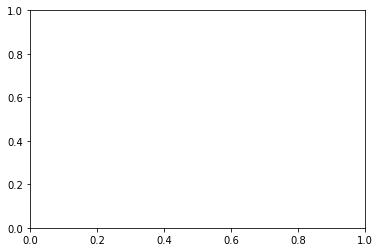

In [29]:
#accuracy and robustness values for each model
image_corruptions = ['zoom blur', 'gauss blur', 'brightness', 'gauss noise', 'contrast']

model1_robustness = [0.85, 0.75, 0.6, 0.45, 0.3]

model2_robustness = [0.9, 0.8, 0.65, 0.5, 0.35]

model3_robustness = [0.5, 0.33, 0.25, 0.26, 0.34]

model4_robustness = [0.35, 0.3, 0.5, 0.5, 0.3]



# Create a new figure and axis object
fig, ax = plt.subplots()
'''
# Plot the data for each model
ax.plot(image_corruptions,model1_robustness,label='VGG19')
ax.plot(image_corruptions,model2_robustness, label='ResNet50')
ax.plot(image_corruptions,model3_robustness,label='VGG16')
ax.plot(image_corruptions,model4_robustness, label='ResNet101')
'''
# Example data
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
corruptions = ['Gaussian', 'Shot Noise', 'Impulse Noise', 'Defocus Blur']
robustness_values = np.array([
    [0.8, 0.7, 0.6, 0.9],  # Model 1
    [0.7, 0.6, 0.8, 0.9],  # Model 2
    [0.9, 0.7, 0.8, 0.6],  # Model 3
    [0.6, 0.8, 0.7, 0.9],  # Model 4
])

plt.bar(model1_robustness, model2_robustness, model3_robustness, model4_robustness, bottom=None, align='centre')
# Set the axis labels and title
ax.set_xlabel('Corruptions', fontweight="bold", fontsize="15")
ax.set_ylabel('Robustness', fontweight="bold", fontsize="15")
ax.set_title('Robustness of different Models against image corruptions',fontweight="bold", fontsize="17")

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


In [ ]:

model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
corruptions = ['Gaussian', 'Shot Noise', 'Impulse Noise', 'Defocus Blur']

robustness_values = np.array([
    [0.8, 0.7, 0.6, 0.9],  # Model 1
    [0.7, 0.6, 0.8, 0.9],  # Model 2
    [0.9, 0.7, 0.8, 0.6],  # Model 3
    [0.6, 0.8, 0.7, 0.9],  # Model 4
])

# Create a horizontal bar chart
fig, ax = plt.subplots()
bar_width = 0.2
opacity = 0.8
index = np.arange(len(corruptions))

colors = ['r', 'g', 'b', 'y']
for i in range(len(model_names)):
    ax.bar(robustness_values[i], bar_width,
            alpha=opacity, color=colors[i], label=model_names[i])

# Add axis labels, title, and legend
ax.set_ylabel('Robustness Values')
ax.set_xlabel('Image Corruptions')
ax.set_title('Comparison of Neural Network Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(corruptions)
ax.legend()

plt.show()
